## [作業重點]
確保你了解隨機森林模型中每個超參數的意義，並觀察調整超參數對結果的影響

## 作業

1. 試著調整 RandomForestClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型與決策樹的結果進行比較

## Iris Datasets

#### RandomForest

In [21]:
from sklearn import datasets, metrics, linear_model
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import os
os.environ['PATH'] = os.environ['PATH'] + (';D:\\pythonwork\\graphviz\\release\\bin\\')
import pydotplus

In [28]:
# 讀取鳶尾花資料集
iris = datasets.load_iris()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=4)

# 建立模型 (使用 20 顆樹，每棵樹的最大深度為 4)
clf = RandomForestClassifier(n_estimators=20,criterion="gini", max_features="auto", max_depth=4, min_samples_split=2, min_samples_leaf=1)

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.9736842105263158


In [29]:
print("Feature importance: ", clf.feature_importances_)

Feature importance:  [0.12084752 0.01948872 0.4176334  0.44203035]


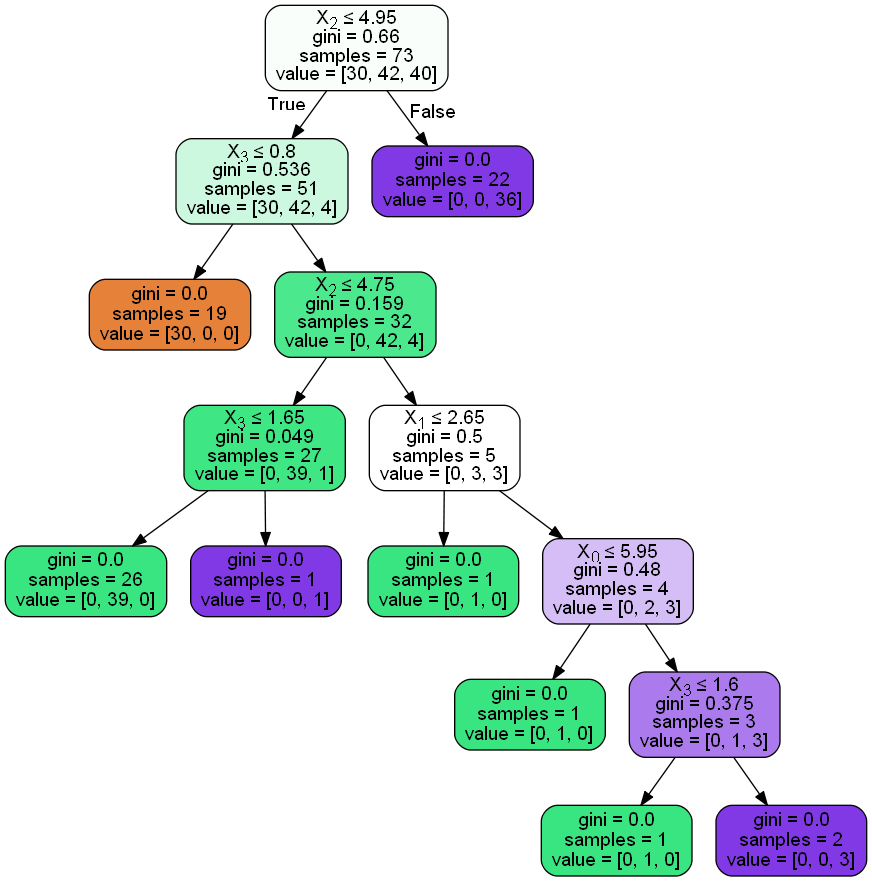

In [15]:
dot_data = StringIO()
export_graphviz(clf.estimators_[2], out_file = dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

#### Decision Tree

In [30]:
clf2 = DecisionTreeClassifier(
        criterion = 'gini',
        max_depth = 4,
        min_samples_split = 2,
        min_samples_leaf = 1
)
clf2.fit(x_train, y_train)
y2_pred = clf2.predict(x_test)
acc2 = metrics.accuracy_score(y_test, y2_pred)
print("Accuracy:",acc2)

Accuracy: 0.9736842105263158


#### Logistic Regression

In [31]:
regr = linear_model.LogisticRegression()
regr.fit(x_train, y_train)
y3_pred = regr.predict(x_test)
acc3 = metrics.accuracy_score(y_test, y3_pred)
print("Accuracy:",acc3)

Accuracy: 0.9210526315789473


## Boston Datasets

#### RandomForest

In [33]:
boston = datasets.load_boston()
xb_train, xb_test, yb_train, yb_test = train_test_split(boston.data, boston.target, test_size=0.25, random_state = 4)
clf3 =  RandomForestRegressor(n_estimators=20,criterion="mse", max_features="auto", max_depth=4, min_samples_split=2, min_samples_leaf=1)
clf3.fit(xb_train, yb_train)
yb_pred = clf3.predict(xb_test)
mse = metrics.mean_squared_error(yb_test, yb_pred)
print("MSE:",mse)

MSE: 19.704864429605554


In [34]:
print("Feature importance: ", clf3.feature_importances_)

Feature importance:  [4.67313648e-02 4.65560737e-04 4.13478643e-03 1.11244668e-03
 1.51733657e-02 4.95443549e-01 2.86607240e-03 6.10687236e-02
 6.29937031e-04 6.12942138e-03 1.16063683e-02 3.95603532e-03
 3.50682369e-01]


#### Decision Tree

In [35]:
clf4 = DecisionTreeRegressor(
        criterion = 'mse',
        max_depth = 4,
        min_samples_split = 2,
        min_samples_leaf = 1
)
clf4.fit(xb_train, yb_train)
yb2_pred = clf4.predict(xb_test)
mse2 = metrics.mean_squared_error(yb_test, yb2_pred)
print("MSE:",mse2)

MSE: 27.760703168072958


#### linear regression

In [36]:
regr = linear_model.LinearRegression()
regr.fit(xb_train, yb_train)
yb3_pred = regr.predict(xb_test)
mse3 = metrics.mean_squared_error(yb_test, yb3_pred)
print("MSE:",mse3)

MSE: 26.947085144448707
